In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)


17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed
# we'll verify this below
# Here is a list of maximum indexes in every review --- we search the maximum index in this
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [4]:
# Let's quickly decode a review
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of se
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # Creates an all zero matrix of shape
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1 # Sets specific indices of results[i]
  return results
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [6]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
X_train.shape

(25000, 10000)

Vectorizing Lables

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [10]:
model.compile(
optimizer=optimizers.RMSprop(learning_rate=0.001),
loss = losses.binary_crossentropy,
metrics = [metrics.binary_accuracy]
)

In [11]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [12]:
history = model.fit(
partial_X_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 4s 105ms/step - loss: 0.5496 - binary_accuracy: 0.7737 - val_loss: 0.4788 - val_binary_accuracy: 0.7832
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3578 - binary_accuracy: 0.8860 - val_loss: 0.3370 - val_binary_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2693 - binary_accuracy: 0.9112 - val_loss: 0.3185 - val_binary_accuracy: 0.8753
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2162 - binary_accuracy: 0.9315 - val_loss: 0.2802 - val_binary_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 5s 163ms/step - loss: 0.1795 - binary_accuracy: 0.9418 - val_loss: 0.3022 - val_binary_accuracy: 0.8788
Epoch 6/20
30/30 [==============================] - 5s 151ms/step - loss: 0.1528 - binary_accuracy: 0.9515 - val_loss: 0.2802 - val_binary_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - 

In [13]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

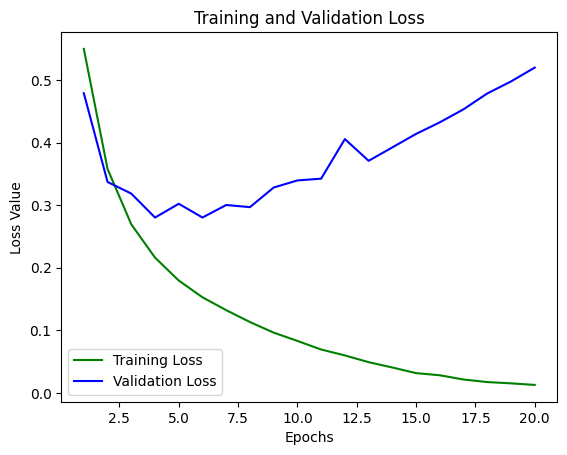

In [14]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

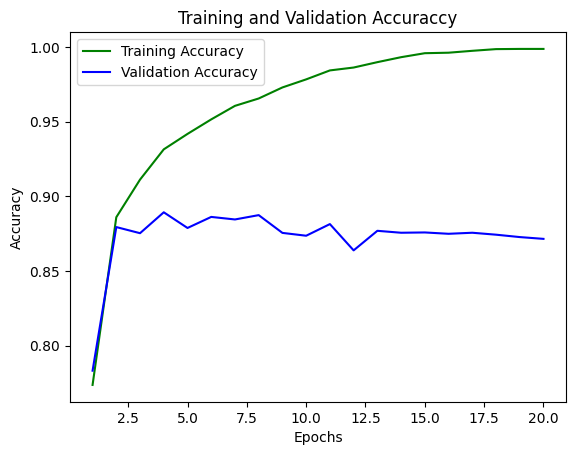

In [15]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
model.fit(
partial_X_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(X_val, y_val)
)


Epoch 1/3
30/30 [==============================] - 3s 86ms/step - loss: 0.0104 - binary_accuracy: 0.9993 - val_loss: 0.5319 - val_binary_accuracy: 0.8743
Epoch 2/3
30/30 [==============================] - 2s 56ms/step - loss: 0.0064 - binary_accuracy: 0.9999 - val_loss: 0.5576 - val_binary_accuracy: 0.8732
Epoch 3/3
30/30 [==============================] - 1s 49ms/step - loss: 0.0075 - binary_accuracy: 0.9993 - val_loss: 0.5756 - val_binary_accuracy: 0.8723


In [17]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)


782/782 [==============================] - 2s 2ms/step


In [18]:
result


array([[0.01123624],
       [0.99999857],
       [0.51631236],
       ...,
       [0.00065892],
       [0.00525629],
       [0.9821892 ]], dtype=float32)

In [20]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
  y_pred[i] = np.round(score)


<ipython-input-20-a8875d258568>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [21]:
mae = metrics.mean_absolute_error(y_pred, y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.13964>

<!-- This code snippet is for building a basic neural network using Keras to classify movie reviews from the IMDB dataset as positive or negative. Let's break down each part:

Libraries Imported
import numpy as np: NumPy is used for numerical computations and array operations.
from keras.datasets import imdb: This imports the IMDB dataset from Keras.
from keras import models, layers, optimizers, losses, metrics: These are various components of the Keras library used for building and training neural networks.
import matplotlib.pyplot as plt: Matplotlib is used for plotting.
%matplotlib inline: This magic command in Jupyter notebooks ensures that matplotlib plots are displayed inline.
Loading and Preprocessing Data
python
Copy code
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
Loads the IMDB dataset with the most frequent 10,000 words, where each word in a review is represented by an integer index.
Building the Model
python
Copy code
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
Initializes a sequential model.
Adds two dense layers with 16 neurons each and ReLU activation function.
Adds an output layer with a single neuron and sigmoid activation for binary classification.
Compiling the Model
python
Copy code
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
Compiles the model with RMSprop optimizer, binary cross-entropy loss (suitable for binary classification), and accuracy as the metric.
Training the Model
python
Copy code
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_test, y_test))
Trains the model on the training data (x_train, y_train) for 10 epochs with a batch size of 512.
Uses the validation data (x_test, y_test) for evaluating the model's performance during training.
Plotting Training History
python
Copy code
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
Plots the training and validation loss curves using Matplotlib to visualize the model's performance during training.
Model Evaluation
python
Copy code
results = model.evaluate(x_test, y_test)
print(results)
Evaluates the trained model on the test data and prints the test loss and accuracy.
This code demonstrates a complete workflow of building, training, and evaluating a neural network model for sentiment analysis using the IMDB dataset. -->

<!-- Group B Deep Learning
 Assignment No: 2B
 Title of the Assignment: Multiclass classification using Deep Neural Networks: Example: Use the OCR
 letter recognition dataset https://archive.ics.uci.edu/ml/datasets/letter+recognition
 Objective of the Assignment: Students should be able to solve Multiclass classification using Deep
 Neural NetworksSolve
 Prerequisite:
 1.
 2.
 3.
 Basic of programming language
 Concept of Multi Classification
 Concept of Deep Neural Network--------------------------------------------------------------------------------------------------------------
Contents for Theory:
 1.
 2.
 3.
 4.
 What is Multi-Classification
 Example of Multi-Classification
 How Deep Neural Network Work on Multi-Classification
 Code Explanation with Output--------------------------------------------------------------------------------------------------------------
SNJB’s Late Sau. K.B. Jain College Of Engineering
What is multiclass classification ?
 Multi Classification, also known as multiclass classification or multiclass classification problem, is a type
 of classification problem where the goal is to assign input data to one of three or more classes or
 categories. In other words, instead of binary classification, where the goal is to assign input data to one of
 two classes (e.g., positive or negative), multiclass classification involves assigning input data to one of
 several possible classes or categories (e.g., animal species, types of products, etc.).
 In multiclass classification, each input sample is associated with a single class label, and the goal of the
 model is to learn a function that can accurately predict the correct class label for new, unseen input data.
 Multiclass classification can be approached using a variety of machine learning algorithms, including
 decision trees, support vector machines, and deep neural networks.
 Some examples of multiclass classification problems include image classification, where the goal is to
 classify images into one of several categories (e.g., animals, vehicles, buildings), and text classification,
 where the goal is to classify text documents into one of several categories (e.g., news topics, sentiment
 analysis).
 Example of multiclass classification
Here are a few examples of multiclass classification problems:
 Image classification: The goal is to classify images into one of several categories. For example, an image
 classification model might be trained to classify images of animals into categories such as cats, dogs, and
 birds.
 Text classification: The goal is to classify text documents into one of several categories. For example, a
 text classification model might be trained to classify news articles into categories such as politics, sports,
 and entertainment.
 Disease diagnosis: The goal is to diagnose patients with one of several diseases based on their symptoms
 and medical history. For example, a disease diagnosis model might be trained to classify patients into
 categories such as diabetes, cancer, and heart disease.
 Speech recognition: The goal is to transcribe spoken words into text. A speech recognition model might
 be trained to recognize spoken words in several languages or dialects.
 Credit risk analysis: The goal is to classify loan applicants into categories such as low risk, medium risk,
 and high risk. A credit risk analysis model might be trained to classify loan applicants based on their credit
 score, income, and other factors.
 In all of these examples, the goal is to assign input data to one of several possible classes or categories.
 SNJB’s Late Sau. K.B. Jain College Of Engineering
Multiclassclassificationisacommontaskinmachinelearningandcanbeapproachedusingavarietyof
 algorithms, including decision trees, support vector machines, and deep neural networks.
 Source Code and Output
 importnumpyasnp
 fromtensorflow.keras.modelsimportSequential
 fromtensorflow.keras.layersimportDense, Dropout
 fromtensorflow.keras.optimizersimportRMSprop
 fromtensorflow.keras.datasetsimportmnist
 importmatplotlib.pyplotasplt
 fromsklearnimportmetrics
 # Load the OCR dataset
 # The MNIST dataset is a built-in dataset provided by Keras.
 #Itconsistsof70,00028x28grayscaleimages,eachofwhichdisplaysasinglehandwrittendigitfrom0
 to 9.
 # The training set consists of 60,000 images, while the test set has 10,000 images.
 (x_train, y_train), (x_test, y_test) = mnist.load_data()
 #X_trainandX_test areourarrayof imageswhiley_trainandy_testareourarrayof labelsforeach
 image.
 # The first tuple contains the training set features (X_train) and the training set labels (y_train).
 # The second tuple contains the testing set features (X_test) and the testing set labels (y_test).
 # For example, if the image shows a handwritten 7, then the label will be the intger 7.
 plt.imshow(x_train[0], cmap='gray') # imshow() functionwhich simply displays an image.
 plt.show()#cmapis responsibleformappingaspecificcolormaptothevaluesfoundinthearraythat
 you passed as the first argument.
 # This is because of the format that all the images in the dataset have:
 # 1. All the images are grayscale, meaning they only contain black, white and grey.
 # 2. The images are 28 pixels by 25 pixels in size (28x28).
 print(x_train[0])
 #imagedataisjustanarrayofdigits.Youcanalmostmakeouta5fromthepatternofthedigitsinthe
 array.
 # Array of 28 values
 SNJB’s Late Sau. K.B. Jain College Of Engineering
#agrayscalepixel isstoredasadigitbetween0and255where0isblack,255iswhiteandvaluesin
 between are different shades of gray.
 # Therefore, each value in the [28][28] array tells the computer which color to put in that position when.
 # reformat our X_train array and our X_test array because they do not have the correct shape.
 # Reshape the data to fit the model
 print("X_train shape", x_train.shape)
 print("y_train shape", y_train.shape)
 print("X_test shape", x_test.shape)
 print("y_test shape", y_test.shape)
 #Hereyoucanseethat for thetrainingsetswehave60,000elementsandthetestingsetshave10,000
 elements.
 # y_train and y_test only have 1 dimensional shapes because they are just the labels of each element.
 #x_trainandx_testhave3dimensionalshapesbecausetheyhaveawidthandheight(28x28pixels)for
 each element.
 #(60000,28,28)1stparameter inthetupleshowsushowmuchimagewehave2ndand3rdparameters
 are the pixel values from x to y (28x28)
 # The pixel value varies between 0 to 255.
 # (60000,) Training labels with integers from 0-9 with dtype of uint8. It has the shape (60000,).
 SNJB’s Late Sau. K.B. Jain College Of Engineering
#(10000,28,28)Testingdatathatconsistsofgrayscaleimages.Ithastheshape(10000,28,28)andthe
 dtype of uint8. The pixel value varies between 0 to 255.
 # (10000,) Testing labels that consist of integers from 0-9 with dtype uint8. It has the shape (10000,).
 X_train shape (60000, 28, 28)
 y_train shape (60000,)
 X_test shape (10000, 28, 28)
 y_test shape (10000,)
 # X: Training data of shape (n_samples, n_features)
 # y: Training label values of shape (n_samples, n_labels)
 # 2D array of height and width, 28 pixels by 28 pixels will just become 784 pixels (28 squared).
 #RememberthatX_trainhas60,000elemenets,eachwith784totalpixelssowillbecomeshape(60000,
 784).
 #WhereasX_test has10,000elements, eachwitheachwith784 total pixels sowillbecomeshape
 (10000, 784).
 x_train = x_train.reshape(60000,784)
 x_test = x_test.reshape(10000,784)
 x_train=x_train.astype('float32')#use32-bitprecisionwhentraininganeuralnetwork,soatonepoint
 thetrainingdatawillhavetobeconvertedto32bitfloats.SincethedatasetfitseasilyinRAM,wemight
 as well convert to float immediately.
 x_test = x_test.astype('float32')
 x_train /=255 # Each image has Intensity from 0to 255
 x_test /=255
 #Regardingthedivisionby255, thisisthemaximumvalueofabyte(theinputfeature'stypebeforethe
 conversion to float32),
 # so this will ensure that the input features are scaled between 0.0 and 1.0.
 # Convert class vectors to binary class matrices
 num_classes =10
 y_train=np.eye(num_classes)[y_train] #Returna2-Darraywithoneson thediagonal andzeros
 elsewhere.
 y_test=np.eye(num_classes)[y_test]#fyourparticularcategoriesispresent thenitmarkas1else0in
 remain row
 # Define the model architecture
 model = Sequential()
 model.add(Dense(512,activation='relu',input_shape=(784,))) #Inputcosistof784Neuronie784input,
 512 in the hidden layer
 model.add(Dropout(0.2))# DROP OUT RATIO 20%
 SNJB’s Late Sau. K.B. Jain College Of Engineering
model.add(Dense(512, activation='relu'))#returns a sequence of another vectors of dimension 512
 model.add(Dropout(0.2))
 model.add(Dense(num_classes, activation='softmax'))# 10 neurons ie output node in the output layer.
 # Compile the model
 model.compile(loss='categorical_crossentropy', #for a multi-class classification problem
 optimizer=RMSprop(),
 metrics=['accuracy'])
 # Train the model
 batch_size =128# batch_size argument is passed tothe layer to define a batch size for the inputs.
 epochs =20
 history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,# verbose=1 will showyou an animated progress bar eg. [==========]
 validation_data=(x_test,y_test))#Usingvalidation_datameansyouareprovidingthe
 training set and validation set yourself,
 # 60000image/128=469 batch each
 # Evaluate the model
 score = model.evaluate(x_test, y_test, verbose=0)
 print('Test loss:', score[0])
 print('Test accuracy:', score[1])
 Test loss: 0.08541901409626007
 Test accuracy: 0.9851999878883362
 Conclusion- In this way we can do Multi classificationusing DNN.
 Assignment Question
 1. What is Batch Size?
 2. What is Dropout?
 3. What isRMSprop?
 4. What  is the Softmax Function?
 5. What is the Relu Function?
 SNJB’s Late Sau. K.B. Jain College Of Engineerin -->